## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных 
по прогнозу поступления в Аспирантуру

Датасет содержит следующие колонки:

-GRE Scores 

-TOEFL Scores 

-University Rating 

-Statement of Purpose and Letter of Recommendation Strength 

-Undergraduate GPA 

-Research Experience 

-Chance of Admit 

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
data = pd.read_csv('data/Admission_Predict.csv', sep=";")

In [18]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    percentage = 100.0 * temp_null_count / data[col].size
    print('{} - {} ({:.2f}%)'.format(col, temp_null_count, percentage))

Serial No. - 0 (0.00%)
GRE Score - 0 (0.00%)
TOEFL Score - 0 (0.00%)
University Rating - 24 (6.00%)
SOP - 0 (0.00%)
LOR  - 0 (0.00%)
CGPA - 0 (0.00%)
Research - 0 (0.00%)
Chance of Admit  - 0 (0.00%)


# 2) Обработка пропусков в количественном признаке

In [19]:
sort_data=data['University Rating'].unique()
sort_data.sort()
print(sort_data)

[ 1.  2.  3.  4.  5. nan]


In [21]:
sort_data_fix=data['University Rating'].unique()
sort_data_fix.sort()
print(sort_data_fix)

[ 1.  2.  3.  4.  5. nan]


(array([ 25.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 104.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 122.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  71.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  54.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
        4.9, 5. ]),
 <BarContainer object of 40 artists>)

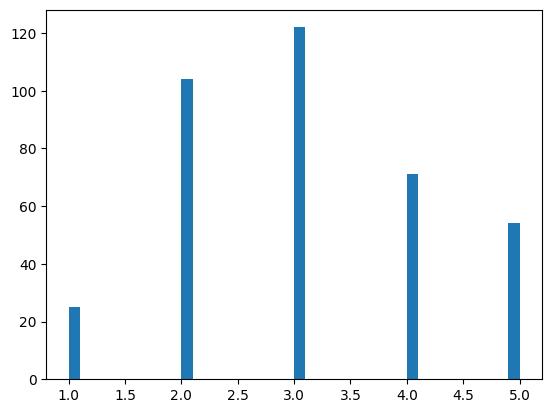

In [23]:
plt.hist(data['University Rating'], bins=40, range=(1,5))

In [24]:

strategies=['mean', 'median', 'most_frequent']
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [26]:
print(test_num_impute_col(data, 'University Rating', strategies[0]))
print(test_num_impute_col(data, 'University Rating', strategies[1]))
print(test_num_impute_col(data, 'University Rating', strategies[2]))

('University Rating', 'mean', 24, 3.0664893617021276, 3.0664893617021276)
('University Rating', 'median', 24, 3.0, 3.0)
('University Rating', 'most_frequent', 24, 3.0, 3.0)


Из гистограммы видно, что наиболее предпочтительнее использовать метод 'mean'.
Сравним полученные гистограммы

KeyError: 'Rating'

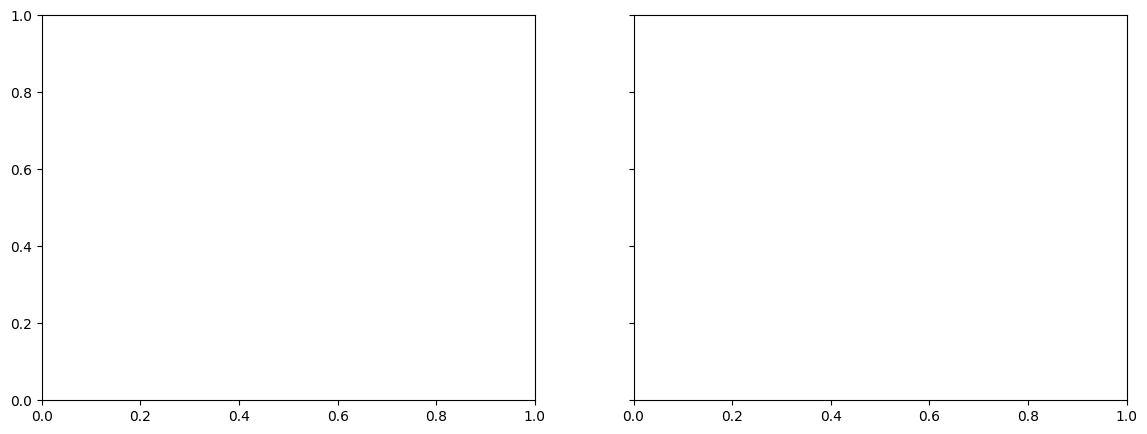

In [27]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(14,5))
ax[0].hist(data['Rating'], bins=40, range=(1,5))
ax[1].hist(data['Rating'].fillna(data['Rating'].mean()), bins=40, range=(1,5))
ax[0].set_title('with NaN')
ax[1].set_title('without NaN')

In [ ]:

data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

# 3) Обработка пропусков в категориальном признаке

In [ ]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
print('Кол-во пропусков: ',data[data['Content Rating'].isnull()].shape[0])
data['Content Rating'].value_counts()

Кол-во пропусков:  0


Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Пропуски можно заполнить значением 'Unrated'

In [ ]:
data_imp = data['Content Rating'].fillna('Unrated')

In [ ]:
print('Кол-во пропусков: ',data_imp[data['Content Rating'].fillna('Unrated').isnull()].shape[0])
data['Content Rating'].fillna('Unrated').value_counts()

Кол-во пропусков:  0


Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Заполним пропуски

In [ ]:
data['Content Rating'] = data['Content Rating'].fillna('Unrated')

# 4) График "Скрипичная диаграмма"

<Axes: xlabel='Rating'>

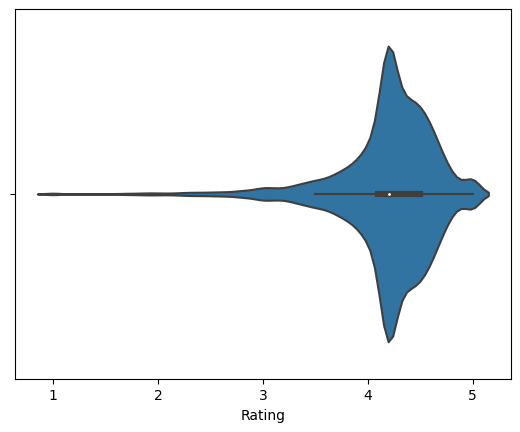

In [ ]:
sns.violinplot(x=data['Rating'])